In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [62]:
df = pd.read_csv('Churn Modeling.csv')

###Data Preprocessing

In [63]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [64]:
df.isnull().values.any()

False

In [65]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [66]:
## removing the columns we do not need - row number , customerid and surname
df.drop(columns = ['CustomerId', 'Surname'], inplace = True)

In [67]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [68]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [69]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [70]:
df['Gender'] = df['Gender'].replace('Male', 1)
df['Gender'] = df['Gender'].replace('Female', 0)

In [71]:
df['Geography'] = df['Geography'].replace('France', 1)
df['Geography'] = df['Geography'].replace('Spain', 2)
df['Geography'] = df['Geography'].replace('Germany', 3)

In [72]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [73]:
##check the outliers. Logistic regression algorithm does not like outliers
df.describe()
## looking at the 75th percentile and the max values, we can see that the data has outliers for Salary, balance, age

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,1.749500,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.830433,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,1.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,1.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,1.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,3.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,3.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: ylabel='Age'>

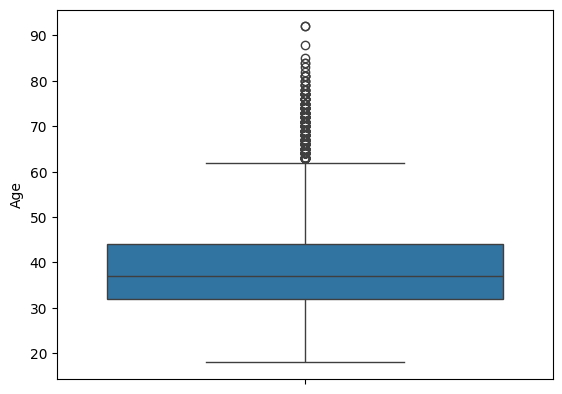

In [74]:
##visualize the outliers for age => limit the age to 85
sns.boxplot(df, y= 'Age')

In [75]:
## limiting the data set to have only records of age less than 85
df = df[df['Age']<85]

In [76]:
scaler = MinMaxScaler()
df[['CreditScore','EstimatedSalary','Balance','Age']] = scaler.fit_transform(df[['CreditScore','EstimatedSalary','Balance','Age']])

<ipython-input-76-3c411de6fcd2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['CreditScore','EstimatedSalary','Balance','Age']] = scaler.fit_transform(df[['CreditScore','EstimatedSalary','Balance','Age']])


In [77]:
X = df.drop('Exited',axis = 1)
y = df['Exited']

In [78]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,1,0,0.363636,2,0.000000,1,1,1,0.506735
1,0.516,2,0,0.348485,1,0.334031,1,0,1,0.562709
2,0.304,1,0,0.363636,8,0.636357,3,1,0,0.569654
3,0.698,1,0,0.318182,1,0.000000,2,0,0,0.469120
4,1.000,2,0,0.378788,2,0.500246,1,1,1,0.395400


##Logistic Regression Analysis

In [79]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(X,y)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [80]:
y_pred =  model.predict(X)

In [81]:
y_pred= np.where(y_pred>0.5,1,0)

In [82]:
print('MSE', mean_squared_error(y, y_pred))

MSE 0.1874749899959984


In [83]:
data = pd.DataFrame({'Actual':y, 'Predicted':y_pred})

In [84]:
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      7959
           1       0.74      0.12      0.21      2037

    accuracy                           0.81      9996
   macro avg       0.78      0.56      0.55      9996
weighted avg       0.80      0.81      0.75      9996



In [85]:
print("Accuracy of model:",accuracy_score(y,y_pred)*100,'%')

Accuracy of model: 81.25250100040016 %


Text(50.722222222222214, 0.5, 'Actual')

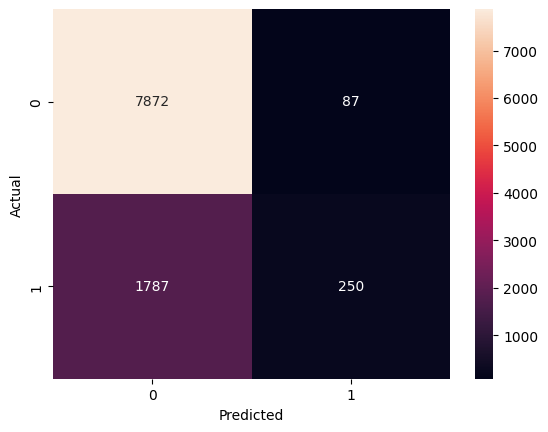

In [86]:
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm,annot = True,fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

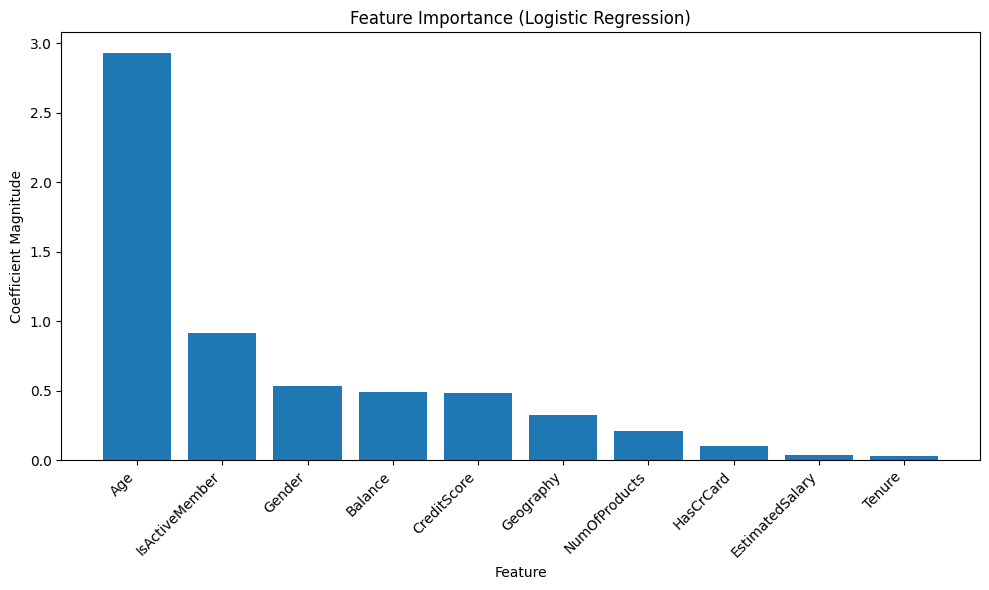

In [87]:
# Get feature coefficients
coefficients = model.coef_[0]
intercept = model.intercept_[0]
feature_names = ['CreditScore',	'Geography','Gender',	'Age'	,'Tenure',	'Balance',	'NumOfProducts',	'HasCrCard',	'IsActiveMember',
                 'EstimatedSalary']

# Sort features based on coefficient magnitude
abs_coefficients = np.abs(coefficients)
sorted_indices = np.argsort(abs_coefficients)[::-1]
sorted_coefficients = abs_coefficients[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot feature coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_coefficients)), sorted_coefficients, align='center')
plt.xticks(range(len(sorted_coefficients)), sorted_feature_names, rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance (Logistic Regression)')
plt.tight_layout()
plt.show()

In [88]:
print(coefficients)

[-0.48419998  0.32425992 -0.53086122  2.93040224 -0.02641487  0.48819082
 -0.21151064 -0.10388174 -0.91244226 -0.03373943]


In [89]:
data.to_csv('Predicted.csv', index = False)